<a href="https://colab.research.google.com/github/Analytic-Abdul/ITC-Role-Based-Aptitude-Test/blob/main/ITC_Role_Based_Aptitude_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITC RBAT: Analyzing & Visualizing Bitcoin Price in Python

## Process Steps

---


To analyse bitcoin price data, the following steps are to be carried out:

1.   !pip install necessary dependencies, including:
    *   pycoingecko to get bitcoin prices for the past 365 days max
    *   mysql-connector-python to connect your cloud database
    *   newsapi-python to collect news about bitcoin for sentiment analysis
    *   other dependencies as become necessary during the analysis


2.   Import necessary libraries
    *   numpy for mathematical manipulation
    *   pandas for data manipulation
    *   matplotlib for data visualization
    *   etc


3.   Initialise the respective apis





In [1]:
# pip install the right dependencies to programmatically get bitcoin data

!pip install pycoingecko              #for price data
!pip install mysql-connector-python   #for connecting data to a cloud db
!pip install newsapi-python           #for bitcoin news


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 32.6 MB/s eta 0:00:00


In [7]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from pprint import pprint
import mysql.connector
from google.colab import files
from google.colab import userdata


In [3]:
# initialise the CoinGecko API to ingest price data

cg = CoinGeckoAPI()


## Bitcoin Data Analysis

In [ ]:
# get the current BTC/USD price

current_price = cg.get_price(ids='bitcoin', vs_currencies='usd')['bitcoin']['usd']
print(f"Current Bitcoin Price: {current_price} USD")

Current Bitcoin Price: 82715 USD


In [ ]:
# get the BTC/USD price for the past year
# the free-tier of the API is limited to just 1 year of past data

btc_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)
pprint(btc_data)

{'market_caps': [[1710806400000, 1331771923948.0378],
                 [1710892800000, 1223867418062.399],
                 [1710979200000, 1332594162507.5205],
                 [1711065600000, 1287348061971.4202],
                 [1711152000000, 1247366367469.2778],
                 [1711238400000, 1264722355270.5166],
                 [1711324800000, 1323456466317.511],
                 [1711411200000, 1371797489739.3416],
                 [1711497600000, 1375728580463.2524],
                 [1711584000000, 1360261687784.1018],
                 [1711670400000, 1390869723348.0437],
                 [1711756800000, 1374646886107.8396],
                 [1711843200000, 1370247487960.0945],
                 [1711929600000, 1401370211582.3662],
                 [1712016000000, 1373784286061.3486],
                 [1712102400000, 1288360536576.547],
                 [1712188800000, 1301670235623.7266],
                 [1712275200000, 1348455954443.3696],
                 [1712361600000

In [ ]:
# Extract prices, market caps, and total volumes
prices = btc_data['prices']
market_caps = btc_data['market_caps']
total_volumes = btc_data['total_volumes']


In [ ]:
# show the value pairs (list of lists) for each key of the dictionary returned
# from the API

pprint(prices)
pprint(market_caps)
pprint(total_volumes)

[[1710806400000, 67708.94360930806],
 [1710892800000, 62132.51737873437],
 [1710979200000, 67819.05570684028],
 [1711065600000, 65535.97844847657],
 [1711152000000, 63509.04496523133],
 [1711238400000, 64285.80279102199],
 [1711324800000, 67310.98326810106],
 [1711411200000, 69938.94530200244],
 [1711497600000, 70082.05122475982],
 [1711584000000, 69435.75040305211],
 [1711670400000, 70710.19534863312],
 [1711756800000, 69919.05546148612],
 [1711843200000, 69702.3087473573],
 [1711929600000, 71246.95144060145],
 [1712016000000, 69785.92503802372],
 [1712102400000, 65440.41922587159],
 [1712188800000, 66123.938539074],
 [1712275200000, 68542.17715279506],
 [1712361600000, 67978.61023408506],
 [1712448000000, 69000.6499164776],
 [1712534400000, 69401.97360911008],
 [1712620800000, 71624.18486236996],
 [1712707200000, 69158.64381207665],
 [1712793600000, 70527.88997578963],
 [1712880000000, 70106.66413070948],
 [1712966400000, 67252.10504226631],
 [1713052800000, 64404.82548907413],
 [171

In [ ]:
# find the len of the value pairs and confirm they are the same

if len(prices) == len(market_caps) == len(total_volumes):
    print("All lists have the same length.")
else:
    print("Lists have different lengths.")

All lists have the same length.


In [ ]:
# Create a list of data for the DataFrame
data = []
for i in range(len(prices)):
    timestamp = prices[i][0]
    price = prices[i][1]
    market_cap = market_caps[i][1]
    total_volume = total_volumes[i][1]
    data.append([timestamp, price, market_cap, total_volume])



In [ ]:
# Create the DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'price', 'market_cap', 'total_volume'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Display the DataFrame
print(df)

                            price    market_cap  total_volume
timestamp                                                    
2024-03-19 00:00:00  67708.943609  1.331772e+12  5.110182e+10
2024-03-20 00:00:00  62132.517379  1.223867e+12  8.017942e+10
2024-03-21 00:00:00  67819.055707  1.332594e+12  7.083680e+10
2024-03-22 00:00:00  65535.978448  1.287348e+12  4.839366e+10
2024-03-23 00:00:00  63509.044965  1.247366e+12  4.243660e+10
...                           ...           ...           ...
2025-03-14 00:00:00  81098.900524  1.608477e+12  3.258359e+10
2025-03-15 00:00:00  83971.709161  1.665726e+12  2.857148e+10
2025-03-16 00:00:00  84391.690876  1.674173e+12  1.076180e+10
2025-03-17 00:00:00  82610.617503  1.638672e+12  2.163803e+10
2025-03-18 12:28:05  82711.581098  1.638967e+12  2.484312e+10

[365 rows x 3 columns]


In [ ]:
# Display the first few rows of the data
df.head()

# Get descriptive statistics of the data
df.describe()

,price,market_cap,total_volume
count,365.000000,3.650000e+02,3.650000e+02
mean,75166.134527,1.485382e+12,4.238513e+10
std,15748.854943,3.141668e+11,3.075734e+10
min,53923.356111,1.064889e+12,6.340607e+09
25%,62966.529319,1.241834e+12,2.399885e+10
50%,67920.296486,1.339928e+12,3.451207e+10
75%,93663.447520,1.854873e+12,4.906793e+10
max,106182.236820,2.100630e+12,3.051904e+11


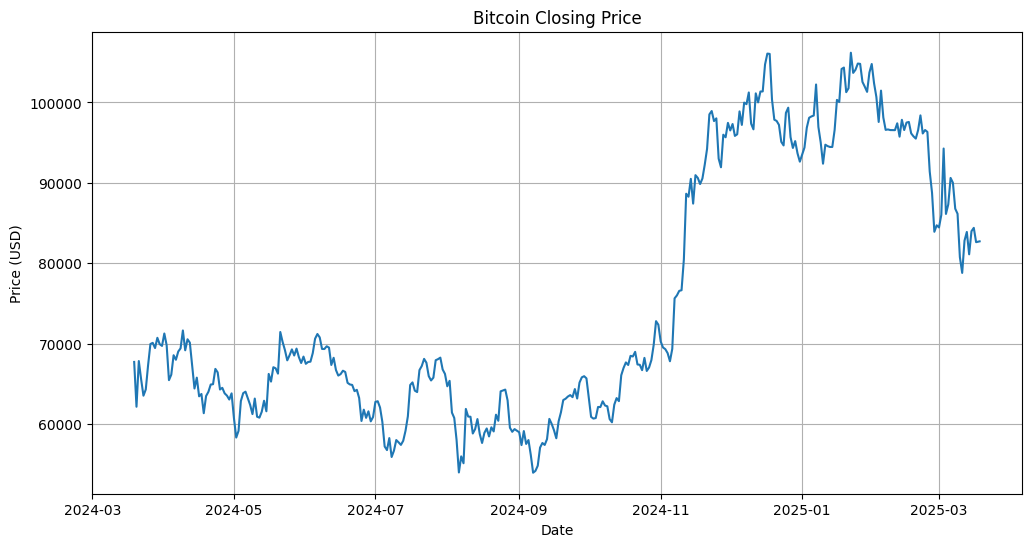

In [ ]:
# Plot the closing price of Bitcoin over time
plt.figure(figsize=(12, 6))
plt.plot(df['price'])
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

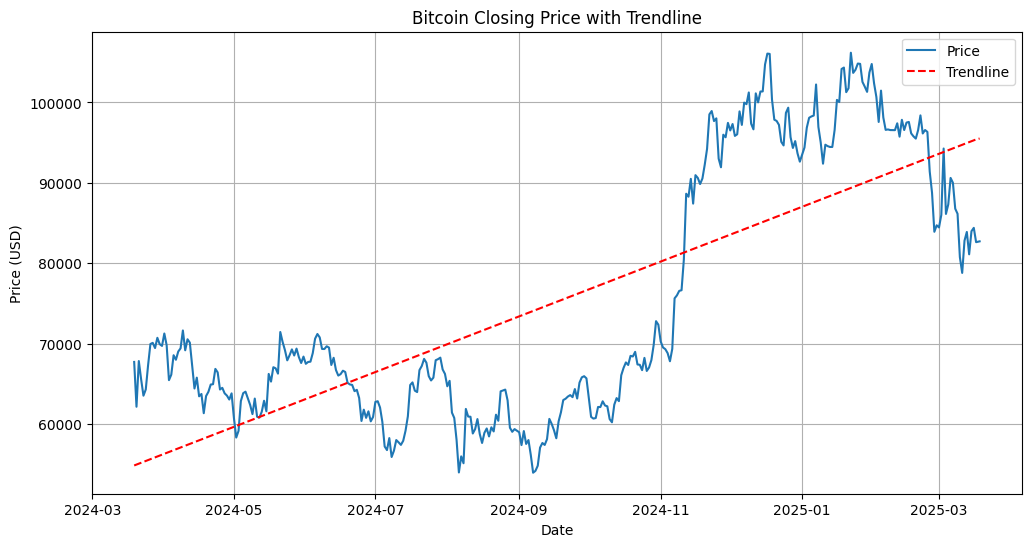

In [ ]:
# Calculate a linear trendline
x = np.arange(len(df['price']))
z = np.polyfit(x, df['price'], 1)
p = np.poly1d(z)

# Plot the price and the trendline
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Price')
plt.plot(df.index, p(x), 'r--', label='Trendline')
plt.title('Bitcoin Closing Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


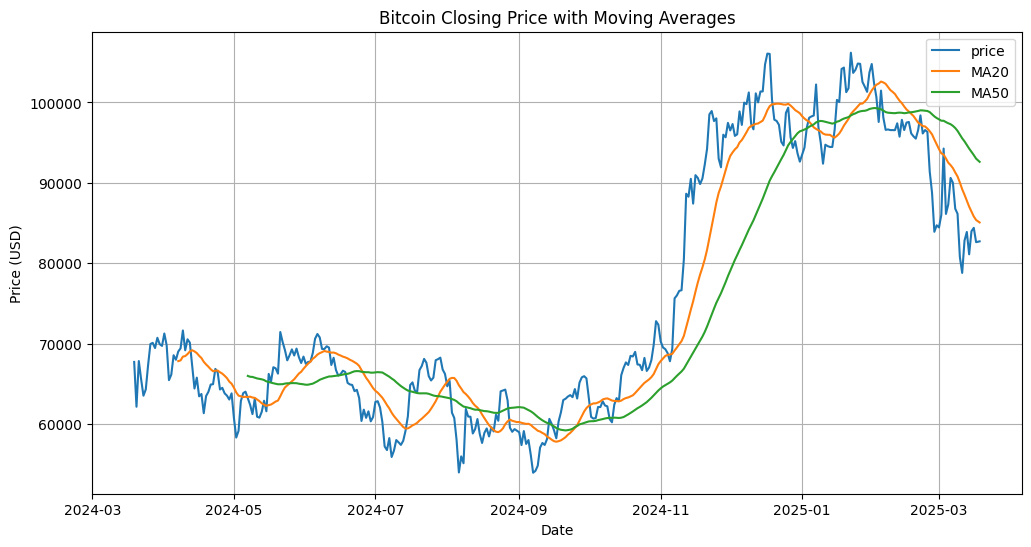

In [ ]:
# Calculate 20-day and 50-day moving averages
df['MA20'] = df['price'].rolling(window=20).mean()
df['MA50'] = df['price'].rolling(window=50).mean()

# Plot the moving averages along with the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['price'], label='price')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Export the Bitcoin data table

In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('bitcoin_data.csv')

# Download the CSV file to your local machine
from google.colab import files
files.download('bitcoin_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Connect to Google Cloud MySQL Server

---


To connect successfully to the MySQL Server Instance running on GCP, you need to authorize the ip-address for the vm the collab notebook is connecting with.
This can be achieved using the requests

In [5]:
#
import requests

def get_ip_address():
  """Retrieves the external IP address of the machine."""
  try:
    response = requests.get('https://api.ipify.org?format=json')
    response.raise_for_status()  # Raise an exception for bad status codes
    ip_address = response.json()['ip']
    return ip_address
  except requests.exceptions.RequestException as e:
    print(f"Error getting IP address: {e}")
    return None

ip_address = get_ip_address()

if ip_address:
  print(f"Your Colab notebook's IP address is: {ip_address}")
else:
  print("Unable to determine IP address.")

Your Colab notebook's IP address is: 35.230.34.126


In [8]:
# Connect to Google Cloud SQL
try:
    connection = mysql.connector.connect(
        host="34.78.89.74",
        port=3306,
        database="ITC_RBAT_db",
        user="Abdulbasit",
        password= userdata.get('MySQL_Password'),
        # Add a connection timeout
        connection_timeout=100  # Adjust the timeout value as needed
    )
    cursor = connection.cursor()
    print("Successfully connected to Cloud SQL")
except mysql.connector.Error as err:
    if err.errno == mysql.connector.errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == mysql.connector.errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(f"Error connecting to Cloud SQL: {err}")

Successfully connected to Cloud SQL


In [ ]:
# Create the table (check if it doesn’t exist first)

cursor.execute("""
    CREATE TABLE IF NOT EXISTS
      bitcoin_prices (
        date DATE PRIMARY KEY,
        price FLOAT,
        market_cap FLOAT,
        total_volume FLOAT
    )
""")

## Sentiment Analysis